In [98]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

#Cargamos el Dataset
file_path = "dataset/dataset.csv"
df = pd.read_csv(file_path)


In [99]:
#Listamos columnas para X y con drop separamos como un filter
X_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour', 'delay', 'terrestrial_range', 
    'slant_range', 'final_latitude', 'final_longitude', 'final_elevation'
]
X = df[X_columns]
Y = df.drop(columns=X_columns)

# Consideramos que las columnas "final_latitude", "final_longitude", "final_elevation"
# No corresponden a parametros de entradas X por lo que lo quitamos.
X = X.drop(columns=['final_latitude','final_longitude','final_elevation'])

#Nota: En Y tenemos 3 tipos(latitudes, longitudes, elevations)
#Generamos los nombres de las columnas. 
lat_columns = [f'lat_{i}' for i in range(1,101)]
long_columns = [f'long_{i}' for i in range(1,101)]
elev_columns = [f'elev_{i}' for i in range(1,101)]

#Teniendo los nombres de las columnas las filtro
latitudes = Y[lat_columns]
longitudes = Y[long_columns]
elevations = Y[elev_columns]
max_value = Y[elev_columns].max()
print("maximo valor por columnas\n",max_value)
print("Maximo valor del conjunto de elevaciones:",max_value.max())


maximo valor por columnas
 elev_1         967.773438
elev_2       11580.748895
elev_3       23228.155579
elev_4       34941.924124
elev_5       46721.758602
                ...      
elev_96     301178.222656
elev_97     302036.621094
elev_98     302895.019531
elev_99     303753.417969
elev_100    304611.816406
Length: 100, dtype: float64
Maximo valor del conjunto de elevaciones: 304611.8164061997


In [100]:
# Para convertir a Excel el df.
#df.to_excel("NuevoExcelCompleto_para_ver.xlsx", index = False)

In [101]:
#Contamos la cantidad de filas que tienen valores distintos de ceros en la columna elev_1
count_non_zero =(Y["elev_1"]!=0).sum()
print("La cantidad de filas con elev_1 != 0 es",count_non_zero)
count_non_zero_elev_100 = (Y["elev_100"]!=0).sum()
print("Cantidad de filas que no finalizan en cero: ", count_non_zero_elev_100)
elev_101 = np.array([])
for i in Y["elev_100"]:
  if i != 0:
    elev_101 = np.append(elev_101,1)
  else:
    elev_101 = np.append(elev_101,0)
print(elev_101,"cantidad: ", len(elev_101))
# Creamos un DataFrame de 0 y 1 para agregar un elev_101 PERO NO ES NECESARIO.
elev_101_df = pd.DataFrame()
elev_101_df["elev_101"] = elev_101
print(elev_101_df)
# Se probo que no es necesario ésta columna

La cantidad de filas con elev_1 != 0 es 280
Cantidad de filas que no finalizan en cero:  1519
[0. 0. 0. ... 1. 1. 1.] cantidad:  5130
      elev_101
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
5125       1.0
5126       1.0
5127       1.0
5128       1.0
5129       1.0

[5130 rows x 1 columns]


In [102]:
# Como la elevación inicial (elev_1) había que forzar el Cero en esa posición en toda la columna
Y["elev_1"] = Y["elev_1"].apply(lambda x: 0.0 if x != 0 else x)
print(Y["elev_1"].max().max())

0.0


In [103]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print("Tipo de dato:",type(x_train),"\n", x_train.head())

Tipo de dato: <class 'pandas.core.frame.DataFrame'> 
       latitude_pos_tx  longitude_pos_tx  elevation_pos_tx          fc  \
1235           -42.28             -63.4                 0  10000000.0   
4047           -42.28             -63.4                 0  20000000.0   
949            -42.28             -63.4                 0  10000000.0   
4375           -42.28             -63.4                 0  23000000.0   
19             -42.28             -63.4                 0  10000000.0   

      elevation  azimuth    year  mmdd  UTI  hour     delay  \
1235          5       98  2010.0   725    0    20  0.009413   
4047         28       89  2010.0  1215    0    12  0.002455   
949           5       98  2010.0   608    0     4  0.009073   
4375         34       87  2010.0  1215    0    12  0.001921   
19            5       98  2010.0   104    0     4  0.009910   

      terrestrial_range   slant_range  
1235       2.719923e+06  2.822081e+06  
4047       6.188348e+05  7.360000e+05  
949     

In [104]:
count_non_zero_elev_100 = (y_train["elev_100"]!=0).sum()
print("Cantidad de filas que no finalizan en cero de y_train: ", count_non_zero_elev_100)


Cantidad de filas que no finalizan en cero de y_train:  1213


In [105]:
max_altura = y_train[elev_columns].max().max()
print(max_altura)
# Normalizo al numero máximo de todas las columnas de elevaciones de y_train
# kilometro = 1000
y_train[elev_columns] = y_train[elev_columns]/max_altura
print(y_train[elev_columns].max())

# Normalizo al maximo del train en el test
y_test[elev_columns] = y_test[elev_columns]/max_altura
print("máximos en el test:",y_test[elev_columns].max().max())


# Busco Maximo y Mínimo en  en las latitudes y longitudes de mi y_train 
max_latitude = y_train[lat_columns].max().max()
min_latitude = y_train[lat_columns].min().min()
print(f"latitud máxima: {max_latitude}, latitud mínima: {min_latitude}")
max_longitude = y_train[long_columns].max().max()
min_longitude = y_train[long_columns].min().min()
print(f"longitud máxima: {max_longitude}, longitud mínima: {min_longitude}")

#Normalizamos latitudes y longitudes.
y_train[lat_columns] = (y_train[lat_columns]-min_latitude)/(max_latitude-min_latitude)
y_test[lat_columns] = (y_test[lat_columns]-min_latitude)/(max_latitude-min_latitude)

y_train[long_columns] = (y_train[long_columns]-min_longitude)/(max_longitude-min_longitude)
y_test[long_columns] = (y_test[long_columns]-min_longitude)/(max_longitude-min_longitude)

print("\nCONJUNTO DE ENTRENAMIENTO: ")
print(f"mínimo en latitud despues de normalizar: {y_train[lat_columns].min().min()}, máximo:{y_train[lat_columns].max().max()}")
print(f"mínimo en longitud despues de normalizar: {y_train[long_columns].min().min()}, máximo:{y_train[long_columns].max().max()}")
print(f"mínimo en Altura despues de normalizar: {y_train[elev_columns].min().min()}, máximo:{y_train[elev_columns].max().max()}")
print("\nCONJUNTO DE PRUEBA: ")
print(f"mínimo en latitud despues de normalizar: {y_test[lat_columns].min().min()}, máximo:{y_test[lat_columns].max().max()}")
print(f"mínimo en longitud despues de normalizar: {y_test[long_columns].min().min()}, máximo:{y_test[long_columns].max().max()}")
print(f"mínimo en Altura despues de normalizar: {y_test[elev_columns].min().min()}, máximo:{y_test[elev_columns].max().max()}")

304611.8164061997
elev_1      0.000000
elev_2      0.038018
elev_3      0.076255
elev_4      0.114710
elev_5      0.153381
              ...   
elev_96     0.988728
elev_97     0.991546
elev_98     0.994364
elev_99     0.997182
elev_100    1.000000
Length: 100, dtype: float64
máximos en el test: 0.9997916149046734
latitud máxima: -25.70365042541332, latitud mínima: -42.88967969254498
longitud máxima: -1.1802133595401931, longitud mínima: -63.40000836722327

CONJUNTO DE ENTRENAMIENTO: 
mínimo en latitud despues de normalizar: 0.0, máximo:1.0
mínimo en longitud despues de normalizar: 0.0, máximo:1.0
mínimo en Altura despues de normalizar: 0.0, máximo:1.0

CONJUNTO DE PRUEBA: 
mínimo en latitud despues de normalizar: 0.0, máximo:0.7700798342042243
mínimo en longitud despues de normalizar: 0.0, máximo:0.7540576190696588
mínimo en Altura despues de normalizar: 0.0, máximo:0.9997916149046734


In [106]:
# Normalizo a MHz las frecuencias de los x_train,x_test con un valor de k1 =1000000
k1 = 1000000
x_train["fc"] = x_train["fc"]/k1
x_test["fc"] = x_test["fc"]/k1
x_test.head()

,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc,elevation,azimuth,year,mmdd,UTI,hour,delay,terrestrial_range,slant_range
5104,-42.28,-63.4,0,30.0,30,91,2010.0,1215,0,12,0.002028,5.022289e+05,6.080000e+05
2186,-42.28,-63.4,0,10.0,5,98,2010.0,1231,0,8,0.004754,1.400465e+06,1.425179e+06
4371,-42.28,-63.4,0,23.0,32,88,2010.0,1215,0,12,0.002028,4.914956e+05,6.080000e+05
831,-42.28,-63.4,0,10.0,5,98,2010.0,519,0,12,0.004826,1.421357e+06,1.446764e+06
1421,-42.28,-63.4,0,10.0,5,98,2010.0,825,0,20,0.008627,2.493939e+06,2.586393e+06


Máximo en columna 'delay': 0.0199453239441
Máximo en columna 'terrestrial_range': 5667054.345030024
Máximo en columna 'slant_range': 5979458.984375


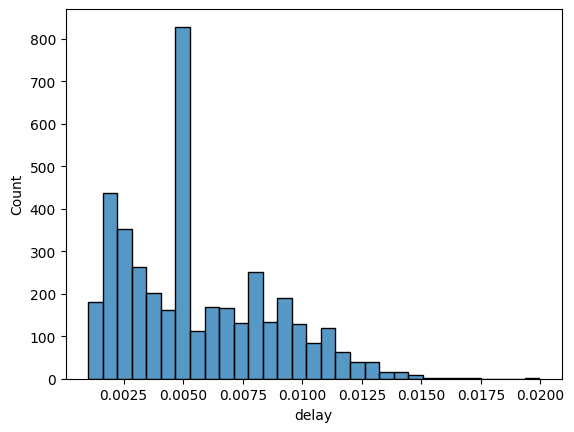

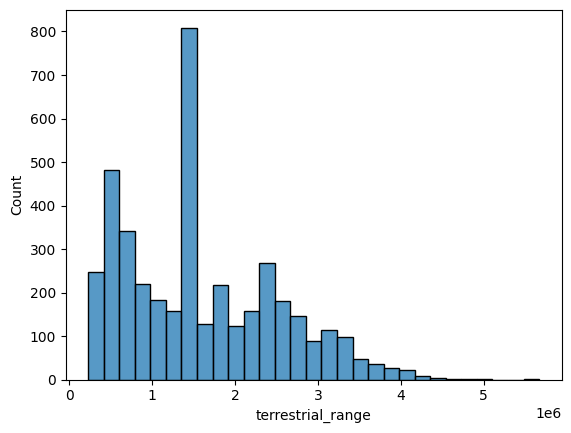

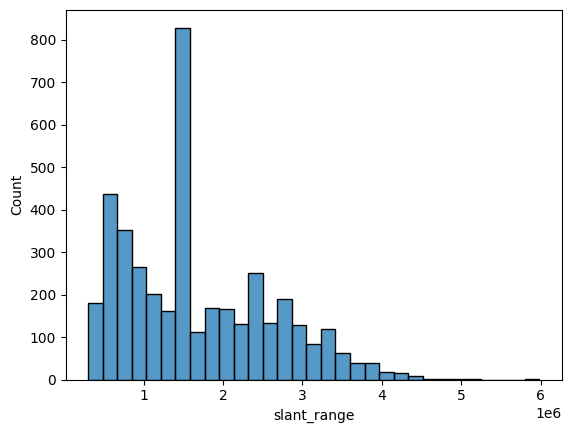

In [107]:

hist_columns = ["delay","terrestrial_range","slant_range"]
for col in x_train.columns:
  if col in hist_columns:
    plt.figure()
    sns.histplot(x_train[col])
print("Máximo en columna 'delay':",x_train["delay"].max())
print("Máximo en columna 'terrestrial_range':",x_train["terrestrial_range"].max())
print("Máximo en columna 'slant_range':",x_train["slant_range"].max())
# Observamos que se los puede estandarizar o normalizar por lo pronto vamos a eliminar estas columnas de mi x_train, x_test


In [108]:
# eliminación de las columnas "delay","terrestrial_range","slant_range"
drop_columns = hist_columns
x_train = x_train.drop(columns = drop_columns)
x_test = x_test.drop(columns = drop_columns)
x_train.head()


,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc,elevation,azimuth,year,mmdd,UTI,hour
1235,-42.28,-63.4,0,10.0,5,98,2010.0,725,0,20
4047,-42.28,-63.4,0,20.0,28,89,2010.0,1215,0,12
949,-42.28,-63.4,0,10.0,5,98,2010.0,608,0,4
4375,-42.28,-63.4,0,23.0,34,87,2010.0,1215,0,12
19,-42.28,-63.4,0,10.0,5,98,2010.0,104,0,4


In [109]:
# Redondeamos a 6 decimas los y_train, y_test
#LUEGO CONSULTAR SI ES NECESARIO NORMALIZAR/ESTANDARIZAR los parametros de X
y_train = y_train.round(6)
y_test = y_test.round(6)



In [110]:

x_train.head()

,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc,elevation,azimuth,year,mmdd,UTI,hour
1235,-42.28,-63.4,0,10.0,5,98,2010.0,725,0,20
4047,-42.28,-63.4,0,20.0,28,89,2010.0,1215,0,12
949,-42.28,-63.4,0,10.0,5,98,2010.0,608,0,4
4375,-42.28,-63.4,0,23.0,34,87,2010.0,1215,0,12
19,-42.28,-63.4,0,10.0,5,98,2010.0,104,0,4


In [111]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [112]:
inputs = Input(shape=(10,))
encoded = Dense(8, activation='tanh')(inputs)  # Compresión 8
# encoded = Dense(32, activation='relu')(encoded)
# decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(300, activation='linear')(encoded)  # Reconstrucción a 100 puntos

autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │         2,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,788 (10.89 KB)

 Trainable params: 2,788 (10.89 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# Entremamiento del modelo
history = autoencoder.fit(x_train,y_train,epochs=70, batch_size=60, validation_data = (x_test,y_test))
# epochs=50 batch_size=32   INICIAL

# # Evaluación si lo realizo por separado.
# loss = autoencoder.evaluate(x_test, y_test)
# print(f"Pérdida en datos de prueba: {loss}")
# # Predicciones
# predicciones = autoencoder.predict(x_test)

Epoch 1/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0761 - val_loss: 0.0234
Epoch 2/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - val_loss: 0.0202
Epoch 3/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 4/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 5/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 6/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - val_loss: 0.0201
Epoch 7/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - val_loss: 0.0201
Epoch 8/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 9/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 10/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205 - val_loss: 0.0202
Epoch 11/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0208 - val_loss: 0.0201
Epoch 12/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0209 - val_lo

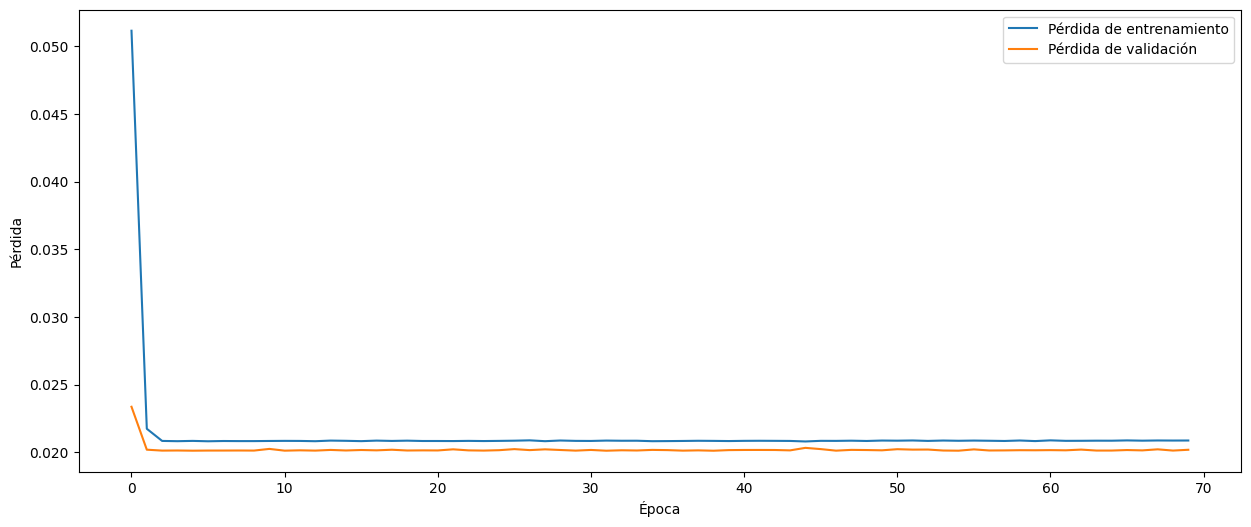

In [114]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida durante el entrenamiento
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [115]:
# Evaluar el modelo en los datos de prueba
loss = autoencoder.evaluate(x_test, y_test)
print(f'Pérdida en datos de prueba: {loss}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207
Pérdida en datos de prueba: 0.020174533128738403


In [116]:
# Realizar predicciones con el conjunto de prueba
predicciones = autoencoder.predict(x_test)

# Mostrar una predicción
print(type(predicciones))
print(predicciones)  # Muestra los primeros 100 puntos predichos

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
<class 'numpy.ndarray'>
[[0.0358399  0.03551019 0.03548401 ... 0.19897282 0.2002846  0.20220022]
 [0.0358399  0.03551019 0.03548401 ... 0.19897282 0.2002846  0.20220022]
 [0.0358399  0.03551019 0.03548401 ... 0.19897282 0.2002846  0.20220022]
 ...
 [0.03583989 0.03551019 0.035484   ... 0.19897282 0.20028463 0.20220022]
 [0.03583989 0.03551019 0.035484   ... 0.19897282 0.20028463 0.20220022]
 [0.03583989 0.03551019 0.035484   ... 0.19897282 0.20028463 0.20220022]]


In [117]:
y_test.head()

,lat_1,lat_2,lat_3,lat_4,lat_5,lat_6,lat_7,lat_8,lat_9,lat_10,...,elev_91,elev_92,elev_93,elev_94,elev_95,elev_96,elev_97,elev_98,elev_99,elev_100
5104,0.035475,0.035432,0.035389,0.035346,0.035303,0.035260,0.035226,0.035194,0.035162,0.035130,...,0.902007,0.911509,0.921010,0.930512,0.940029,0.949600,0.959172,0.968744,0.978316,0.987888
2186,0.035475,0.035317,0.035185,0.035186,0.035133,0.034976,0.034432,0.033502,0.032389,0.031186,...,0.001488,0.001493,0.001285,0.000654,0.000262,0.000109,0.000047,0.000031,0.000016,0.000000
4371,0.035475,0.035581,0.035686,0.035791,0.035897,0.036002,0.036118,0.036234,0.036350,0.036466,...,0.945177,0.954405,0.963634,0.972863,0.982092,0.982619,0.982688,0.982758,0.982827,0.982896
831,0.035475,0.035320,0.035185,0.035186,0.035145,0.034991,0.034536,0.033622,0.032568,0.031386,...,0.001730,0.001112,0.000787,0.000792,0.000592,0.000259,0.000138,0.000093,0.000046,0.000000
1421,0.035475,0.035214,0.035186,0.034985,0.033881,0.032100,0.030146,0.028254,0.026422,0.024652,...,0.035074,0.023814,0.012969,0.005097,0.002261,0.001691,0.000591,0.000007,0.000004,0.000000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


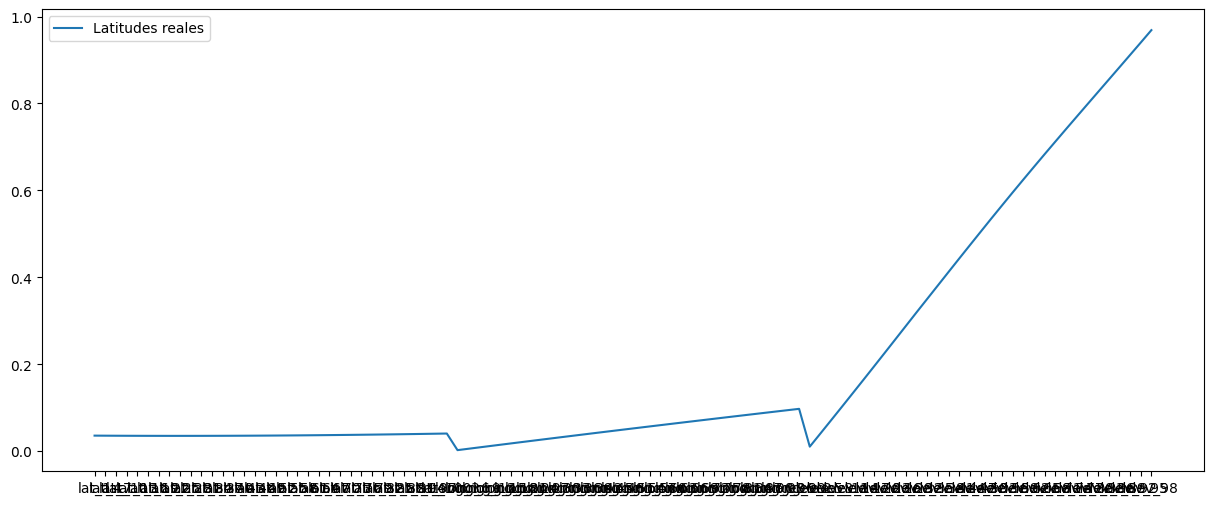

In [118]:
import matplotlib.pyplot as plt

idx = 0  # Elegir una muestra para comparar
y_pred = autoencoder.predict(np.expand_dims(x_test.iloc[idx], axis=0))  # Predicción de una muestra
y_true = y_test.iloc[idx]  # Valores reales de esa muestra

# Graficar las predicciones contra los valores reales (por ejemplo, latitudes)
plt.figure(figsize=(15, 6))
plt.plot(y_true[::3], label='Latitudes reales')
# plt.plot(y_pred[::3], label='Latitudes predichas')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


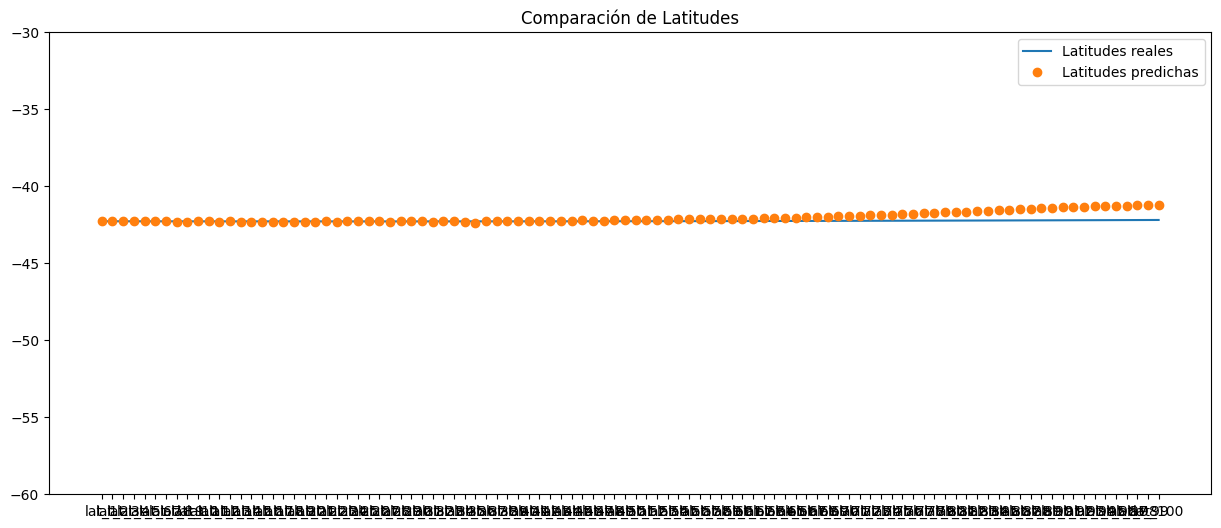

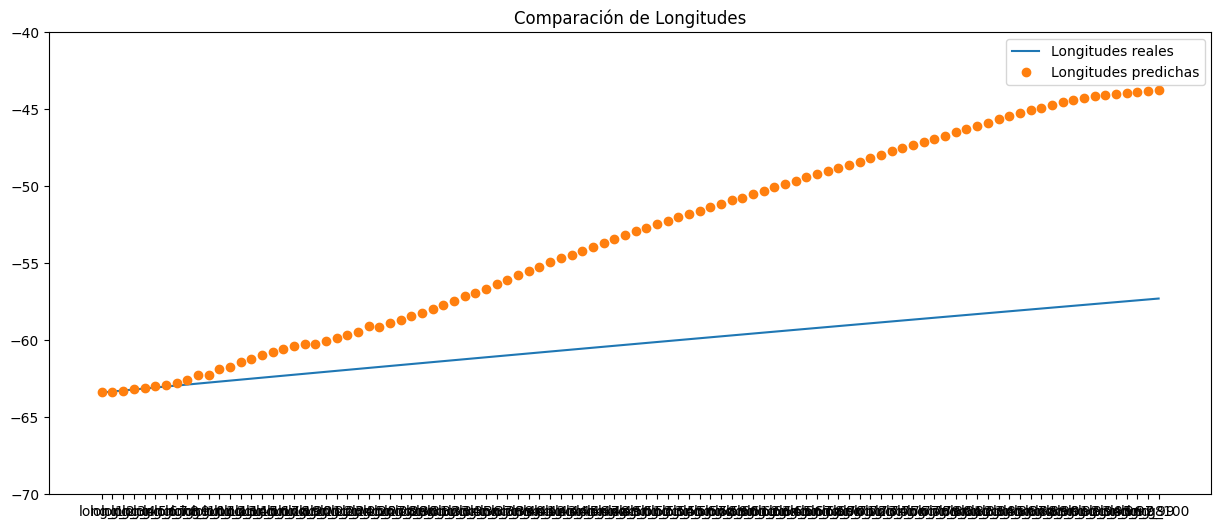

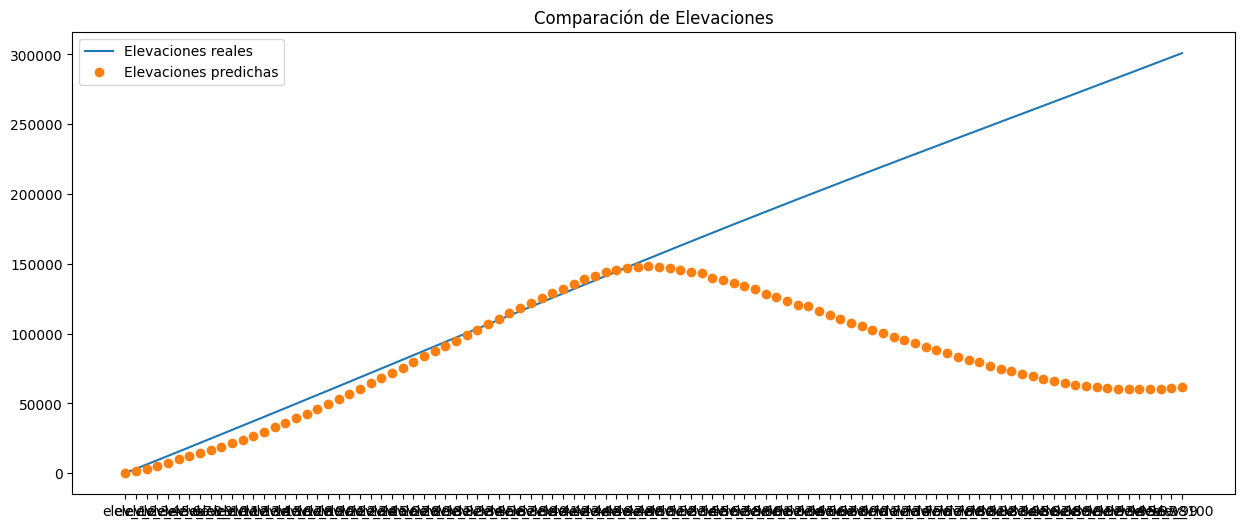

In [119]:
import matplotlib.pyplot as plt

idx = 0  # Elegir una muestra para comparar

# Predicción de una muestra
y_pred = autoencoder.predict(np.expand_dims(x_test.iloc[idx], axis=0))

# Valores reales de esa muestra
y_true = y_test.iloc[idx]

# Separar latitudes, longitudes y elevaciones
y_true_latitudes = y_true[:100]      # Primeras 100 columnas son latitudes
y_true_longitudes = y_true[100:200]  # Columnas 101 a 200 son longitudes
y_true_elevations = y_true[200:300]  # Últimas 100 columnas son elevaciones

y_pred_latitudes = y_pred[0, :100]      # Primeras 100 columnas predichas
y_pred_longitudes = y_pred[0, 100:200]  # Columnas 101 a 200 predichas
y_pred_elevations = y_pred[0, 200:300]  # Últimas 100 columnas predichas

# Graficar las predicciones contra los valores reales

# Latitudes
plt.figure(figsize=(15, 6))
plt.plot((max_latitude-min_latitude)*y_true_latitudes + min_latitude, label='Latitudes reales')
plt.plot((max_latitude-min_latitude)*y_pred_latitudes + min_latitude, label='Latitudes predichas', linestyle = 'None',marker='o')
plt.title('Comparación de Latitudes')
plt.ylim(-60,-30)
plt.legend()
plt.show()

# Longitudes
plt.figure(figsize=(15, 6))
plt.plot((max_longitude-min_longitude)*y_true_longitudes + min_longitude, label='Longitudes reales')
plt.plot((max_longitude-min_longitude)*y_pred_longitudes + min_longitude, label='Longitudes predichas', linestyle = 'None',marker='o') #linestyl e= dashed
plt.title('Comparación de Longitudes')
plt.ylim(-70,-40)
plt.legend()
plt.show()

# Elevaciones
plt.figure(figsize=(15, 6))
plt.plot(max_altura*y_true_elevations, label='Elevaciones reales')
plt.plot(max_altura*y_pred_elevations, label='Elevaciones predichas', linestyle = 'None',marker='o')
plt.ylim()
plt.title('Comparación de Elevaciones')
plt.legend()
plt.show()

In [120]:
y_pred[0,200:300]


array([0.        , 0.00605987, 0.00968829, 0.01678359, 0.02472123,
       0.0327587 , 0.04039946, 0.04695074, 0.05415345, 0.06119667,
       0.06990475, 0.07856962, 0.08799128, 0.09780728, 0.10791556,
       0.11800835, 0.12879255, 0.13975447, 0.15091157, 0.16233394,
       0.17402221, 0.18595864, 0.19832817, 0.21108285, 0.22393033,
       0.23490366, 0.24799171, 0.26051703, 0.2756324 , 0.28610727,
       0.29938063, 0.31196246, 0.32446572, 0.3370296 , 0.34993997,
       0.36241096, 0.37668175, 0.38725558, 0.39950624, 0.41262364,
       0.42302945, 0.43393195, 0.44543964, 0.45621774, 0.46336907,
       0.4719659 , 0.4774052 , 0.48268512, 0.48512152, 0.4861824 ,
       0.4858565 , 0.48213258, 0.47825086, 0.4739886 , 0.46970958,
       0.46011877, 0.45359218, 0.4461577 , 0.44103214, 0.4327554 ,
       0.42122227, 0.41417712, 0.4046945 , 0.3964458 , 0.3922786 ,
       0.38047743, 0.37097472, 0.36232048, 0.3539142 , 0.34538493,
       0.33730975, 0.32983825, 0.32124466, 0.31319547, 0.30505